<a href="https://colab.research.google.com/github/redsIng/ML_WineProject/blob/main/ml_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [101]:
if IN_COLAB == True:
  from google.colab import drive
  drive.mount('/content/gdrive')
  %cd /content/gdrive/MyDrive/ML_whisky
  !ls

import warnings
warnings.filterwarnings('ignore')


In [102]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

plt.style.use('ggplot')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange',
'xkcd:sea blue',
'xkcd:pale red',
'xkcd:sage green',
'xkcd:terra cotta',
'xkcd:dull purple',
'xkcd:teal',
'xkcd:goldenrod',
'xkcd:cadet blue',
'xkcd:scarlet']

bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

### Separazione X e Y (la quality è il target)

In [103]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np


dataset = ['winequality-red.csv']
df = pd.read_csv(dataset[0])

In [104]:
column_names = list(df.columns.values)
column_names


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

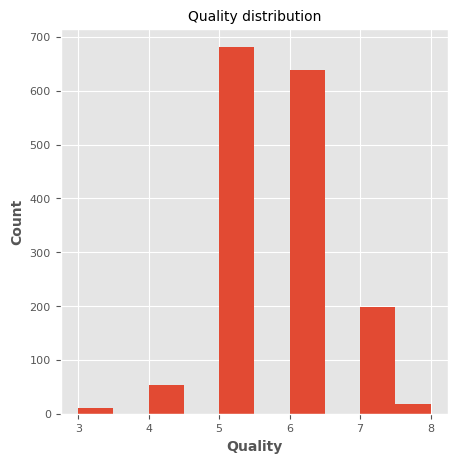

In [105]:
X = df.iloc[:, :-1]
Y = df['quality']

fig = plt.figure(figsize = (5, 5))
plt.hist(df.quality)
plt.xlabel('Quality', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.title('Quality distribution')
plt.show()
X = np.array(X)
Y = np.array(Y)


In [106]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [107]:
Y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

# Preprocessing

## Missing Values

In [108]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Check Zeroes Data 

In [109]:
df[df == 0].count()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

## Normalizzazione dati

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

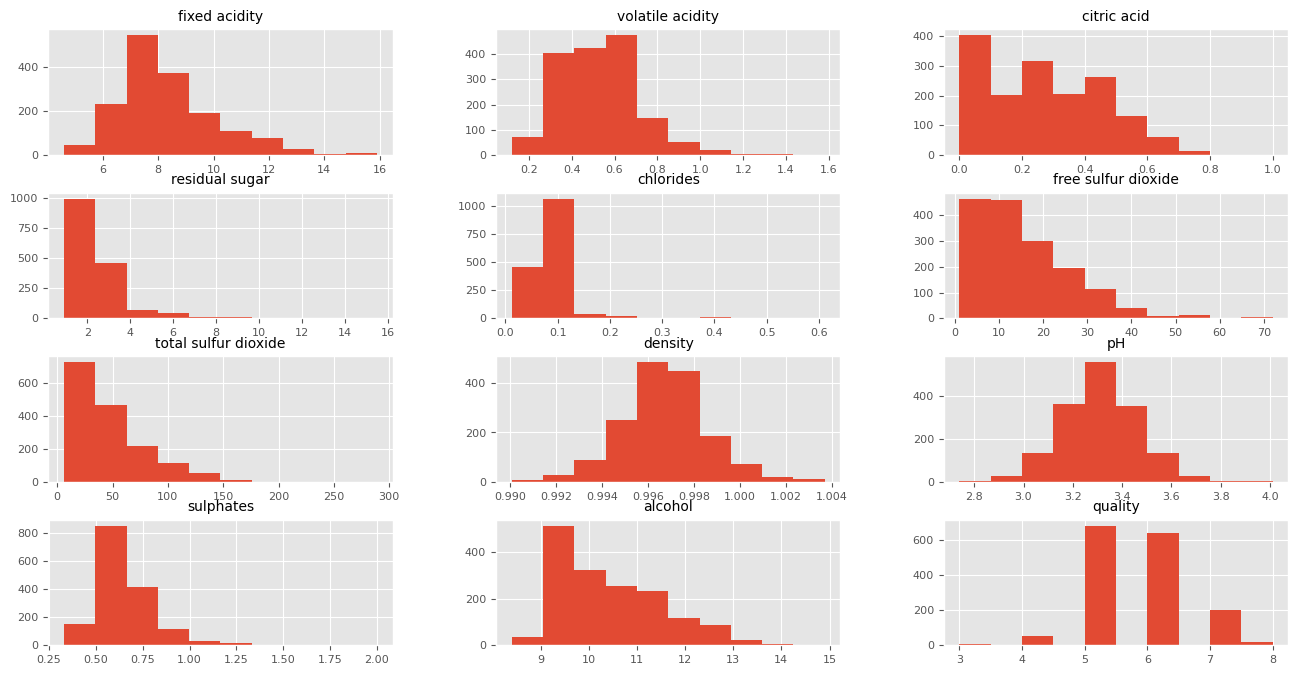

In [110]:
#df=(df-df.min())/(df.max()-df.min())
#normalized_df=(df-df.mean())/df.std()

from sklearn.preprocessing import StandardScaler
import pandas as pd

df.hist()

In [111]:
df.iloc[:,:-1] = StandardScaler().fit_transform(df.iloc[:,:-1])
df = pd.DataFrame(df, columns = column_names)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.466193             -0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261 -0.719933   
2               -0.083669              0.229047  0.134264 -0.331177   
3                0.107592              0.411500  0.664277 -0.979104   
4               -0.466193             -0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054             -0.075043 -0.978765  0.899886   
1595             2.211469              0.137820 -0.862162  1.353436   
1596             1.255161             -0.196679 -0.533554  0.705508   
1597             1.542054             -0.075043 -0.676657  1.677400   
1598             0.203223             -0.135861 -0.666057  0.511130   

      sulphates   alcohol  quality  
0     -0.579207 -0.960246        5  
1      0.128950 -0.584777        5  
2     -0.048089 -0.584777        5  
3     -0.461180 -0.584777        6  
4     -0.579207 -0.960246        5  
...         ...       ...      ...  
1594  -0.461180  0.072294        5  
1595   0.601055  0.729364        6  
1596   0.542042  0.541630        6  
1597   0.305990 -0.209308        5  
1598   0.010924  0.541630        6  

[1599 rows x 12 columns]

## Indici di Varianza, Asimmetria, Curtosi (appiattimento)

In [112]:
df.mean()

fixed acidity           3.435512e-16
volatile acidity        1.699704e-16
citric acid             4.335355e-16
residual sugar         -1.905223e-16
chlorides               7.700046e-17
free sulfur dioxide     1.432042e-16
total sulfur dioxide    1.289532e-16
density                -3.482795e-14
pH                      3.002879e-15
sulphates               7.639596e-16
alcohol                 9.437243e-16
quality                 5.636023e+00
dtype: float64

In [113]:
df.var()

fixed acidity           1.000626
volatile acidity        1.000626
citric acid             1.000626
residual sugar          1.000626
chlorides               1.000626
free sulfur dioxide     1.000626
total sulfur dioxide    1.000626
density                 1.000626
pH                      1.000626
sulphates               1.000626
alcohol                 1.000626
quality                 0.652168
dtype: float64

In [114]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [115]:
df.kurtosis()

fixed acidity            1.132143
volatile acidity         1.225542
citric acid             -0.788998
residual sugar          28.617595
chlorides               41.715787
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
quality                  0.296708
dtype: float64

## Istogrammi

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

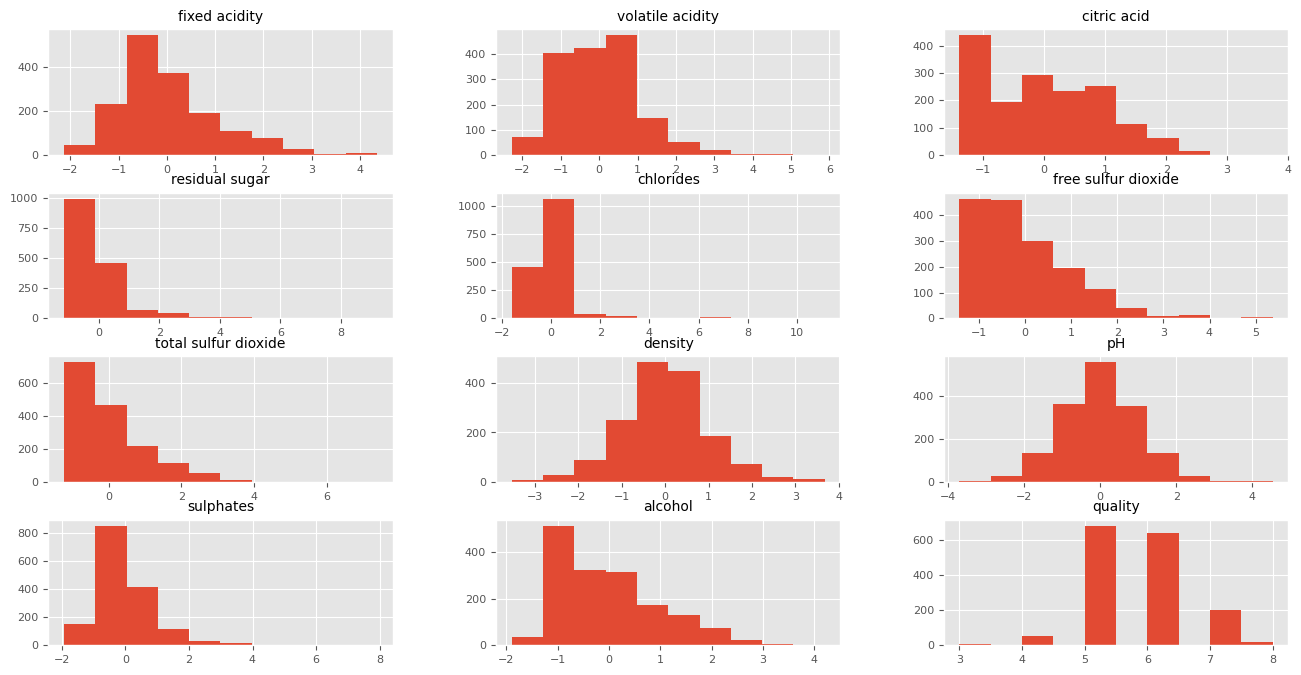

In [116]:
df.hist()

## Check Outliers

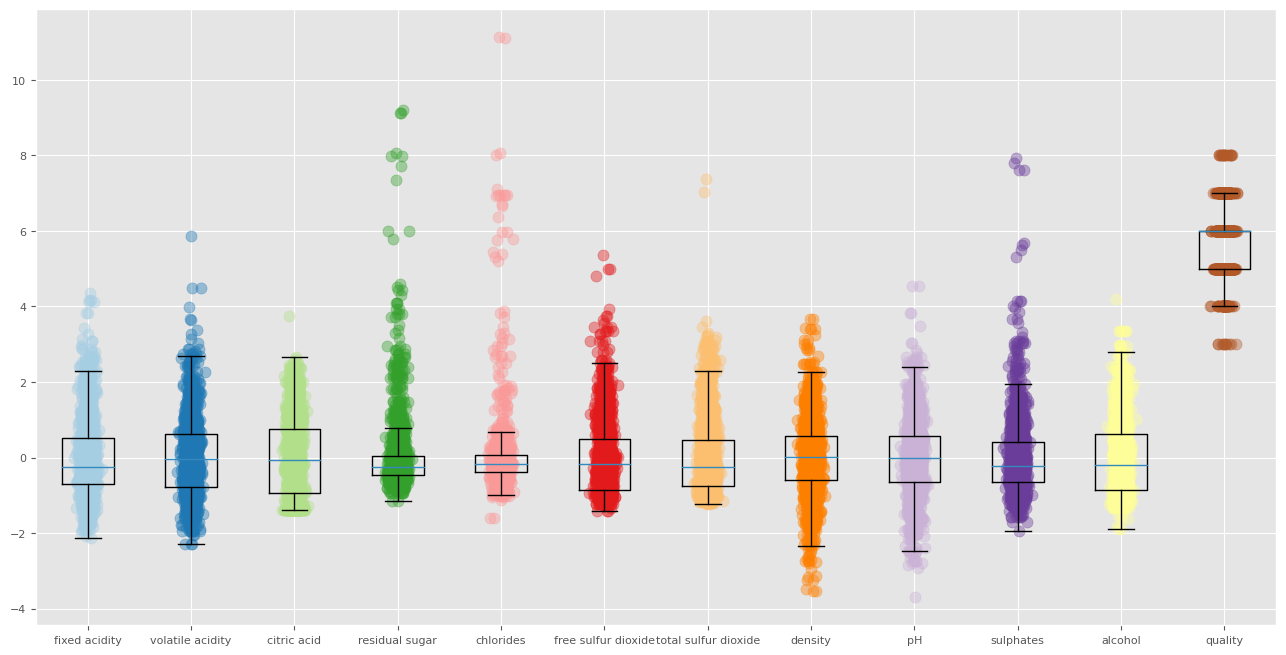

In [117]:
sorted(df)
q1, q3 = np.percentile(df,[25,75])
iqr = q3 - q1

lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

#print(lower_bound,upper_bound)
import seaborn as sns
import colorcet as cc

cols = df.columns
vals, names, xs = [],[],[]
for i,col in enumerate(cols):
    vals.append(df[col].values)
    names.append([col]*len(df[col].values))
    xs.append(np.random.normal(i+1, 0.04, len(df[col].values)))

plt.boxplot(vals, labels=cols, showfliers=False)
palette = sns.color_palette("Paired", n_colors=12)
for x,val,c in zip(xs,vals,palette):
    plt.scatter(x, val, alpha=0.4, color=c)
#for i in range(len(cols)):
# fig = plt.figure(figsize = (10,5))
# df.boxplot(cols[i])
###plt.xlabel(" # wine")
#plt.ylabel("ph")
#plt.title("diagrammi delle barre")
#plt.show()

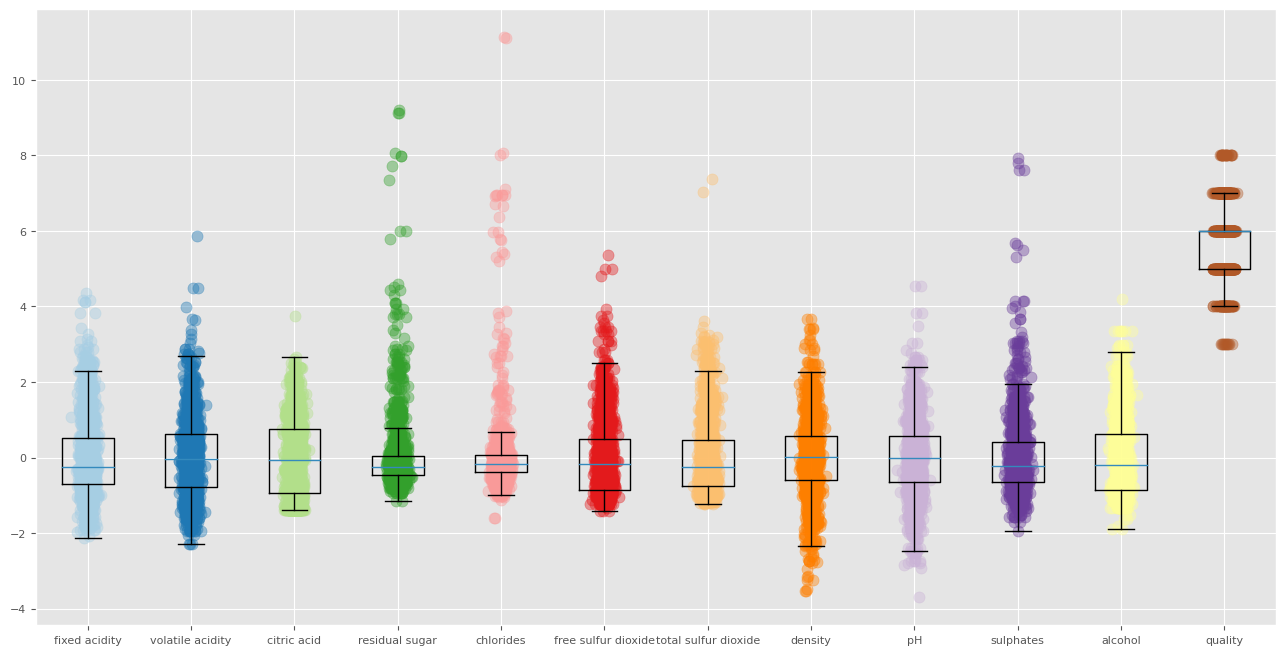

In [118]:
vals, names, xs = [],[],[]
for i,col in enumerate(cols):
    vals.append(df[col].values)
    names.append([col]*len(df[col].values))
    xs.append(np.random.normal(i+1, 0.04, len(df[col].values)))

plt.boxplot(vals, labels=cols, showfliers=False)
palette = sns.color_palette("Paired", n_colors=12)
for x,val,c in zip(xs,vals,palette):
    plt.scatter(x, val, alpha=0.4, color=c)
#for i in range(len(cols)):
# fig = plt.figure(figsize = (10,5))
# df.boxplot(cols[i])
###plt.xlabel(" # wine")
#plt.ylabel("ph")
#plt.title("diagrammi delle barre")
#plt.show()

## Find Realationship between feautures

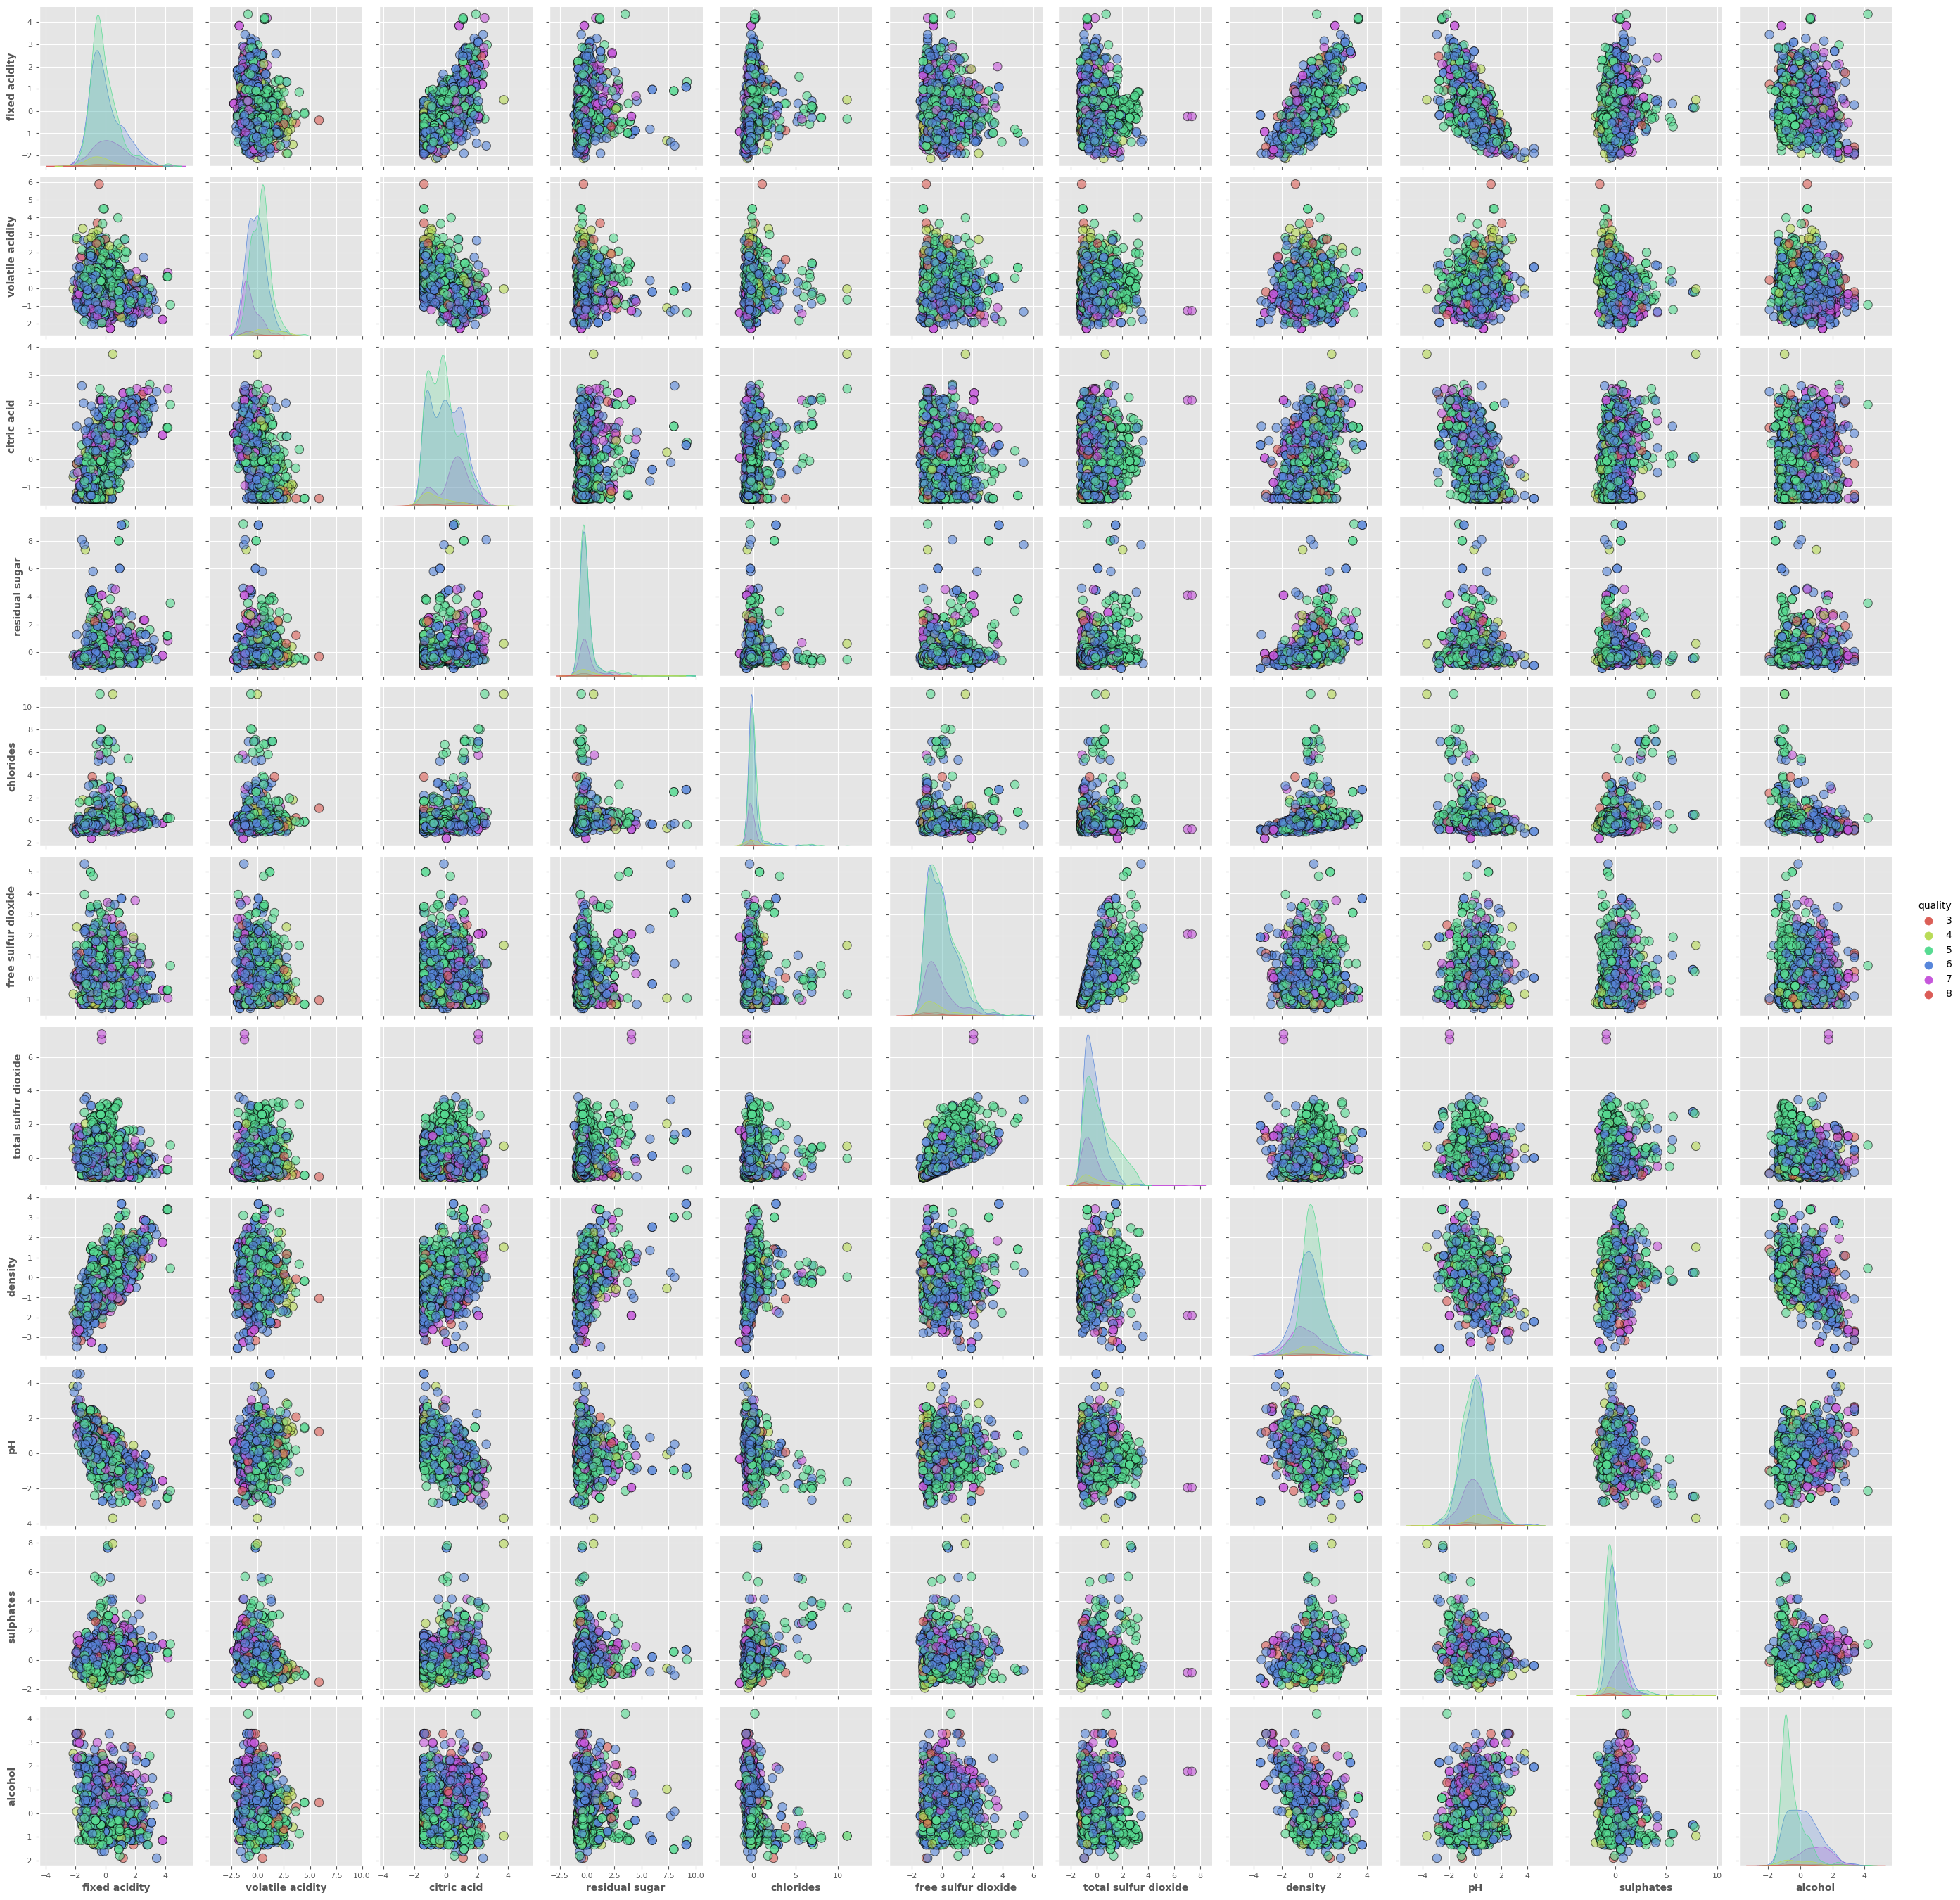

In [119]:
sns.pairplot(df,hue = 'quality', diag_kind = 'kde',
plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},palette='hls')

Y

## Selezione delle features

# Feature Selection

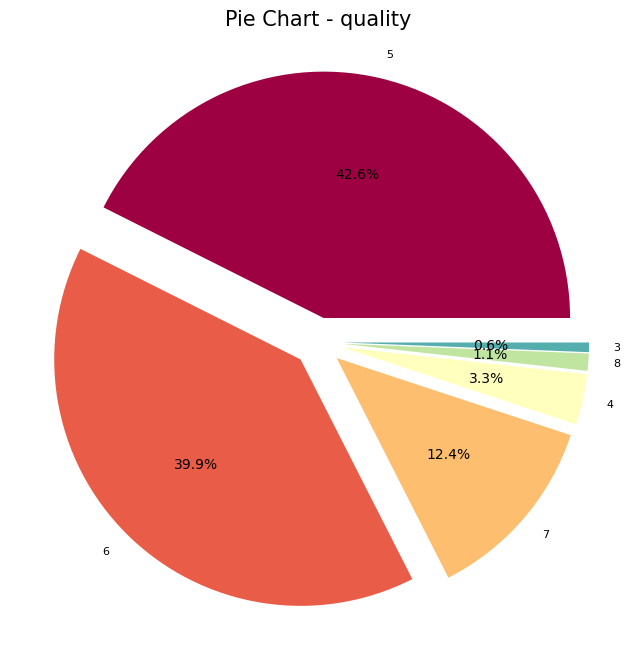

In [120]:
# piechart of the quality column of dataframe
def piechart(df, column):
    labels = df[column].value_counts().index
    values = df[column].value_counts().values
    colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
    spacing = [0.1 for i in  range(len(labels))]
    plt.figure(figsize = (8,8))
    plt.pie(values,explode=spacing, labels = labels, colors = colors, autopct='%1.1f%%')
    plt.title('Pie Chart - {}'.format(column), fontsize = 15)
    plt.show()

piechart(df, 'quality')

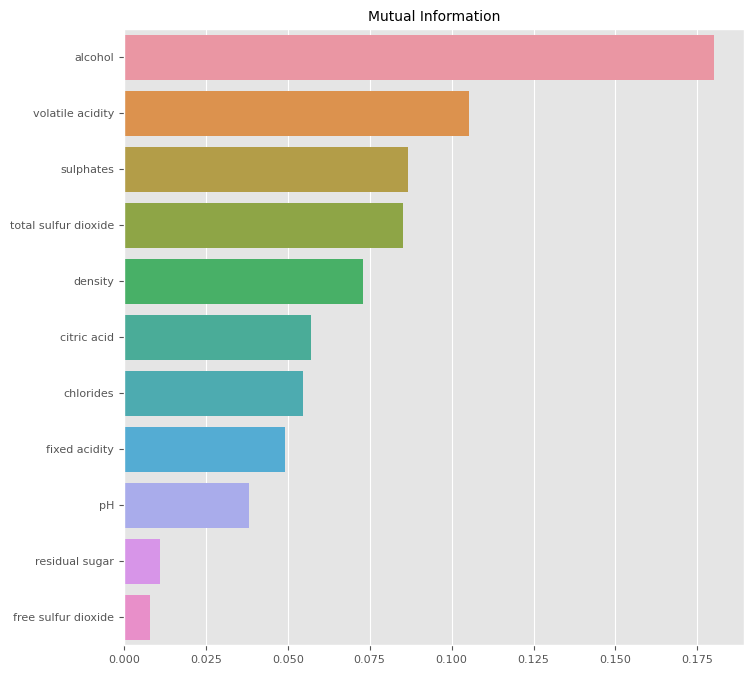

In [121]:
# plot mutual information of dataframe execpt quality column
#import mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
def mutual_info(df):
    df = df.drop('quality', axis = 1)
    mutual_info = mutual_info_classif(df, Y)
    mutual_data = pd.Series(mutual_info, index = df.columns)
    mutual_data.sort_values(ascending = False, inplace = True)
    plt.figure(figsize = (8,8))
    sns.barplot(x = mutual_data, y = mutual_data.index)
    plt.title('Mutual Information')
    plt.show()

mutual_info(df)

### Generazione dataset
#### - Feautures originali
#### - Eliminazione ultime 3 feature (le peggiori) (Feautures Selection)
#### - PCA (Feauter Extraction)
#### - Solo Feature dell'alchol(poiché è la più rilevante)
#### - Fisher Disciminant Analysis

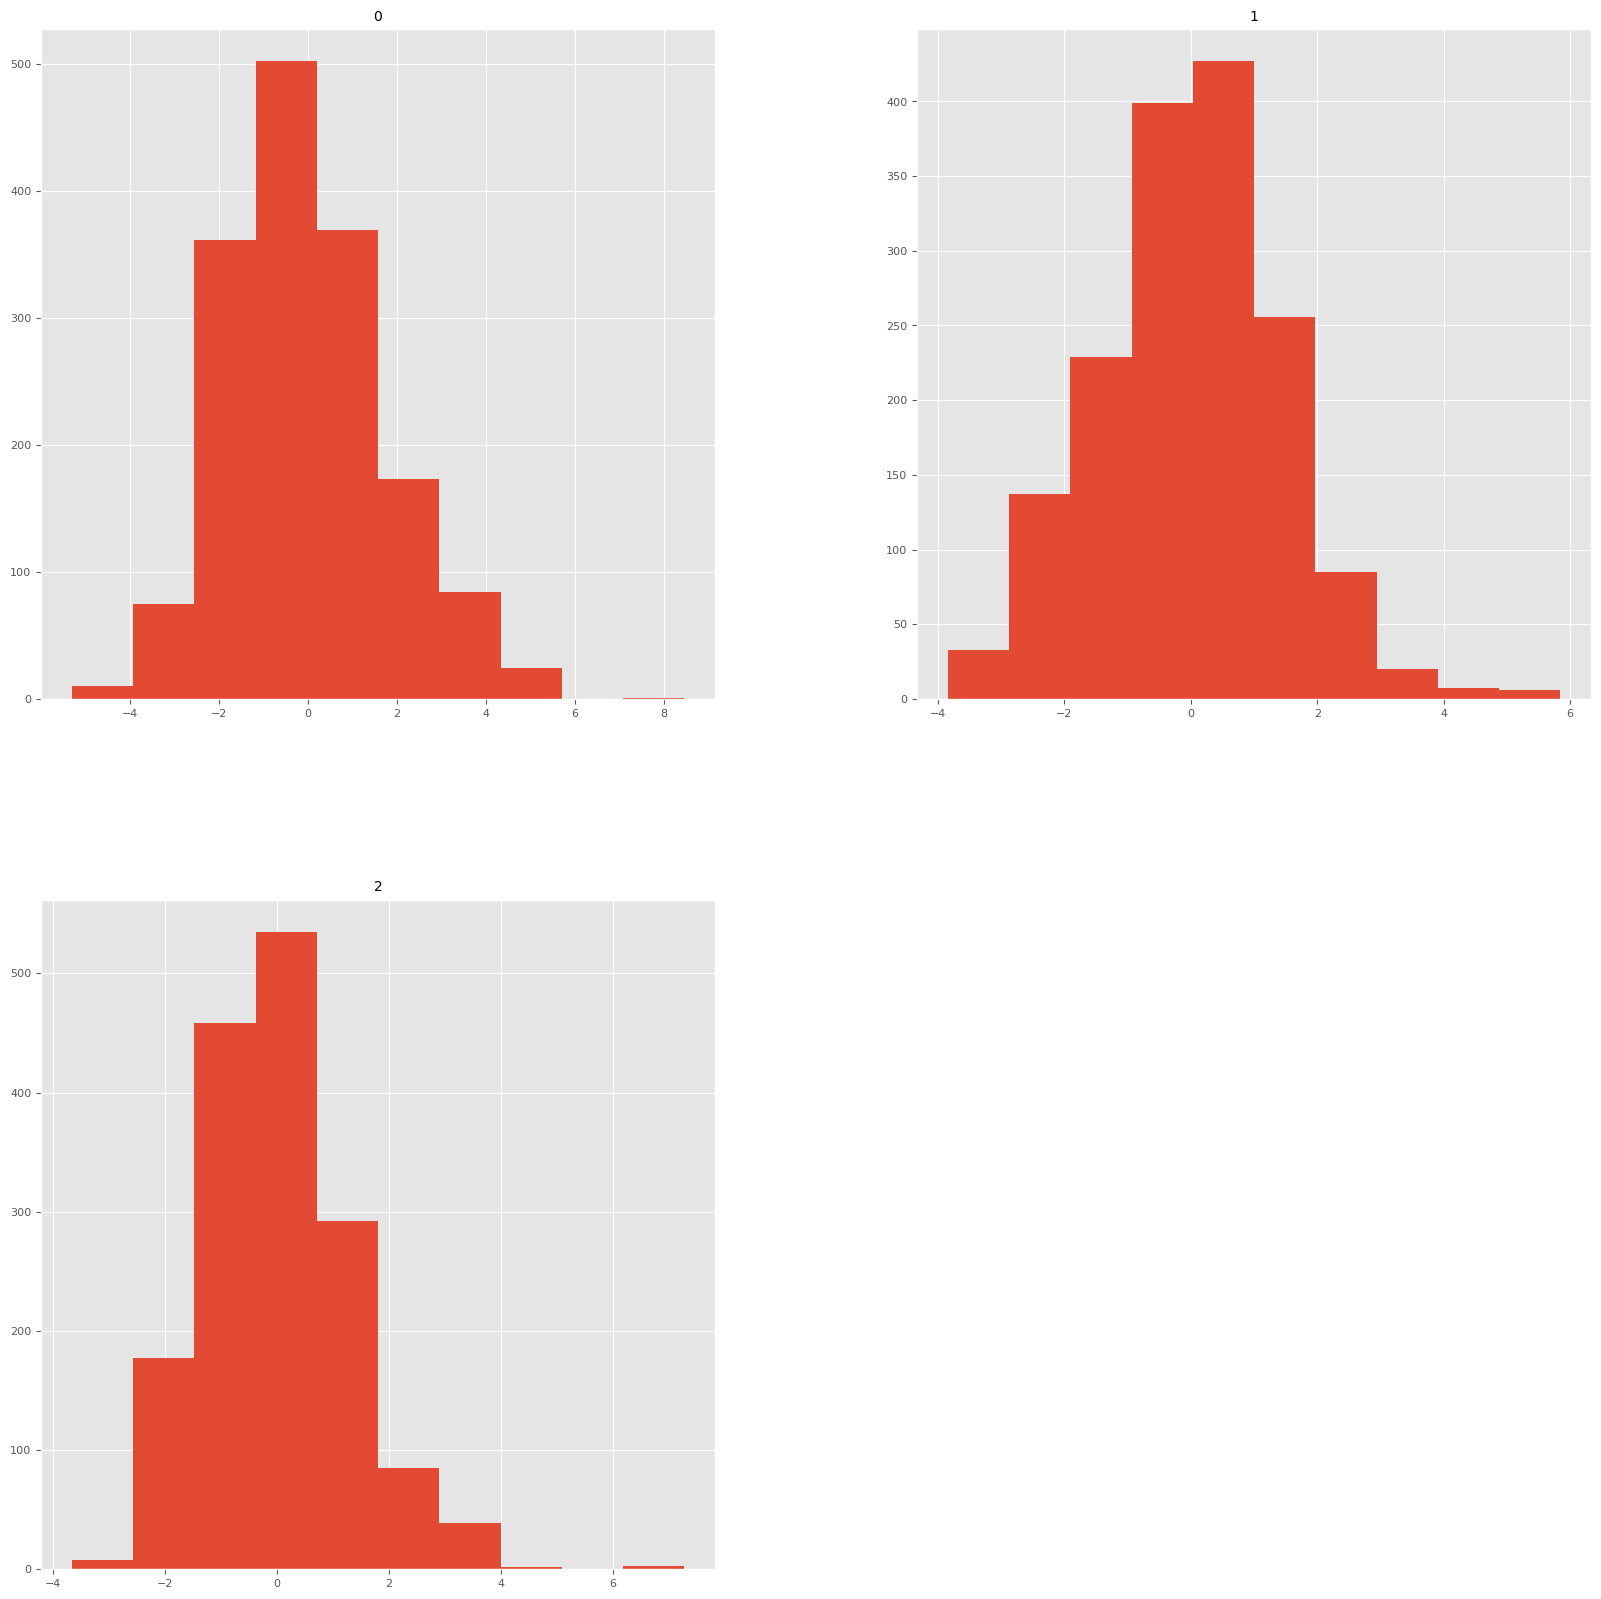

In [126]:
# PCA of dataset k features and return new dataframe and plot distribution of new features with columns name
from sklearn.decomposition import PCA
def pca(df, k):
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(df)
    principalDf = pd.DataFrame(data = principalComponents)
    principalDf.hist(figsize = (20,20))
    plt.show()
    return principalDf

principalDf = pca(df, 3)

### Modelli utilizzati per Classificare: (con Cross Validation)
#### - Classificazione binari (one-vs-all)
#### - Classificazioni Multiclasse (logistic regression)
#### - Alberi
#### - SVM (Vari Kernel)
#### - No rete neurale
#### - Ensemble Methods (Baggin-Boosting)


#### PLOTTARE TUTTE LE METRICE POSSIBILI

In [127]:

# train neural newtork with 3 hidden layers and 10 neurons in each layer for wine quality prediction
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def neural_network(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
    clf = MLPClassifier(hidden_layer_sizes = (10, 10, 10), max_iter = 1000)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(Y_test, Y_pred))

neural_network(df, Y)

Accuracy: 1.0


### Valutazione dei vari approcci e confronti

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
train_set = [X_train,y_train]
val_set = [X_val,y_val]
test_set = [X_test,y_test]

In [ ]:
#train_set

In [ ]:
length_X_train = len(X_train)
length_y_train = len(y_train)

print('x =',length_X_train,',y =',length_y_train)

x = 959 ,y = 959


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
var1 = clf.predict(X_train)

In [ ]:
clf.score(X_train,y_train)

0.5776850886339937

In [ ]:
var1 - y_train

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -2, -1,  0,  2,  1, -1,  1,
       -1,  0, -1,  0,  0,  1, -1,  0,  0, -1,  0, -1,  0,  0, -1,  0, -1,
        1, -2,  0,  0, -2,  0, -1, -1,  0,  0,  0, -2, -2,  0,  0, -1,  0,
        0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,  1,
        0,  0,  0,  1,  0,  0,  0,  1,  0, -1,  0, -1, -1,  0,  0,  0,  1,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0, -2,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  1,  0,  0, -1, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
        0, -1,  2, -1,  0,  0,  0, -1, -1,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  1, -1,  0,  0,  0,  0,
       -1,  0, -1, -1,  1,  0,  0,  0,  0,  0,  0, -1,  2,  0,  1,  0, -1,
        0, -1,  0,  0,  0,  0,  1, -1,  0,  1,  0,  0, -1,  0, -1, -1,  0,
        0, -1,  0, -1,  0,  1,  0,  0,  0, -1,  1,  1,  0,  2, -1,  0,  0,
       -2,  0,  2,  0, -1